In [52]:
pip install missingno 

Note: you may need to restart the kernel to use updated packages.


In [92]:
import pandas as pd
import matplotlib.pyplot as plt  
import numpy as np
import seaborn as sns
import scipy as sp
import missingno as msno
import matplotlib.pyplot as plt

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier  
from scipy.stats import pointbiserialr, kstest, norm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize
from sklearn.neighbors import KNeighborsRegressor


from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    mean_squared_log_error,
    r2_score,
    explained_variance_score
)

from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score,
    f1_score,
    recall_score,
    precision_score,
    roc_auc_score,
    roc_curve,
    RocCurveDisplay,
    auc
)


---
### EDA

In [54]:
escolar = pd.read_csv("C:\\Users\\OMAR DANIEL MEDINA V\\Downloads\\data.csv",sep=';')

escolar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [55]:
escolar.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


Para normalizar, vamos a cambiar el nombre de las columnas y usaremos snake_case para estandarizarlas.

In [56]:
column_map = {
    "Marital status": "estado_marital",
    "Application mode": "modo_aplicacion",
    "Application order": "orden_aplicacion",
    "Course": "curso",
    "Daytime/evening attendance": "tipo_asistencia",
    "Previous qualification": "nivel_prev_educativo",
    "Previous qualification (grade)": "nota_prev_educativa",
    "Nacionality": "nacionalidad",
    "Mother's qualification": "nivel_madre",
    "Father's qualification": "nivel_padre",
    "Mother's occupation": "ocupacion_madre",
    "Father's occupation": "ocupacion_padre",
    "Admission grade": "nota_admision",
    "Displaced": "desplazado",
    "Educational special needs": "necesidades_educativas",
    "Debtor": "moroso",
    "Tuition fees up to date": "matricula_al_dia",
    "Gender": "genero",
    "Scholarship holder": "becado",
    "Age at enrollment": "edad_ingreso",
    "International": "internacional",
    "Curricular units 1st sem (credited)": "uc_1sem_creditadas",
    "Curricular units 1st sem (enrolled)": "uc_1sem_matriculadas",
    "Curricular units 1st sem (evaluations)": "uc_1sem_evaluaciones",
    "Curricular units 1st sem (approved)": "uc_1sem_aprobadas",
    "Curricular units 1st sem (grade)": "uc_1sem_nota",
    "Curricular units 1st sem (without evaluations)": "uc_1sem_sin_eval",
    "Curricular units 2nd sem (credited)": "uc_2sem_creditadas",
    "Curricular units 2nd sem (enrolled)": "uc_2sem_matriculadas",
    "Curricular units 2nd sem (evaluations)": "uc_2sem_evaluaciones",
    "Curricular units 2nd sem (approved)": "uc_2sem_aprobadas",
    "Curricular units 2nd sem (grade)": "uc_2sem_nota",
    "Curricular units 2nd sem (without evaluations)": "uc_2sem_sin_eval",
    "Unemployment rate": "tasa_desempleo",
    "Inflation rate": "tasa_inflacion",
    "GDP": "pib",
    "Target": "objetivo"
}

escolar.rename(columns=column_map, inplace=True)

In [57]:
missing_values = escolar.isnull().sum().sort_values(ascending=False)
print(missing_values)

estado_marital                  0
edad_ingreso                    0
uc_1sem_creditadas              0
uc_1sem_matriculadas            0
uc_1sem_evaluaciones            0
uc_1sem_aprobadas               0
uc_1sem_nota                    0
uc_1sem_sin_eval                0
uc_2sem_creditadas              0
uc_2sem_matriculadas            0
uc_2sem_evaluaciones            0
uc_2sem_aprobadas               0
uc_2sem_nota                    0
uc_2sem_sin_eval                0
tasa_desempleo                  0
tasa_inflacion                  0
pib                             0
internacional                   0
becado                          0
modo_aplicacion                 0
genero                          0
orden_aplicacion                0
curso                           0
Daytime/evening attendance\t    0
nivel_prev_educativo            0
nota_prev_educativa             0
nacionalidad                    0
nivel_madre                     0
nivel_padre                     0
ocupacion_madr

c:\Users\OMAR DANIEL MEDINA V\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


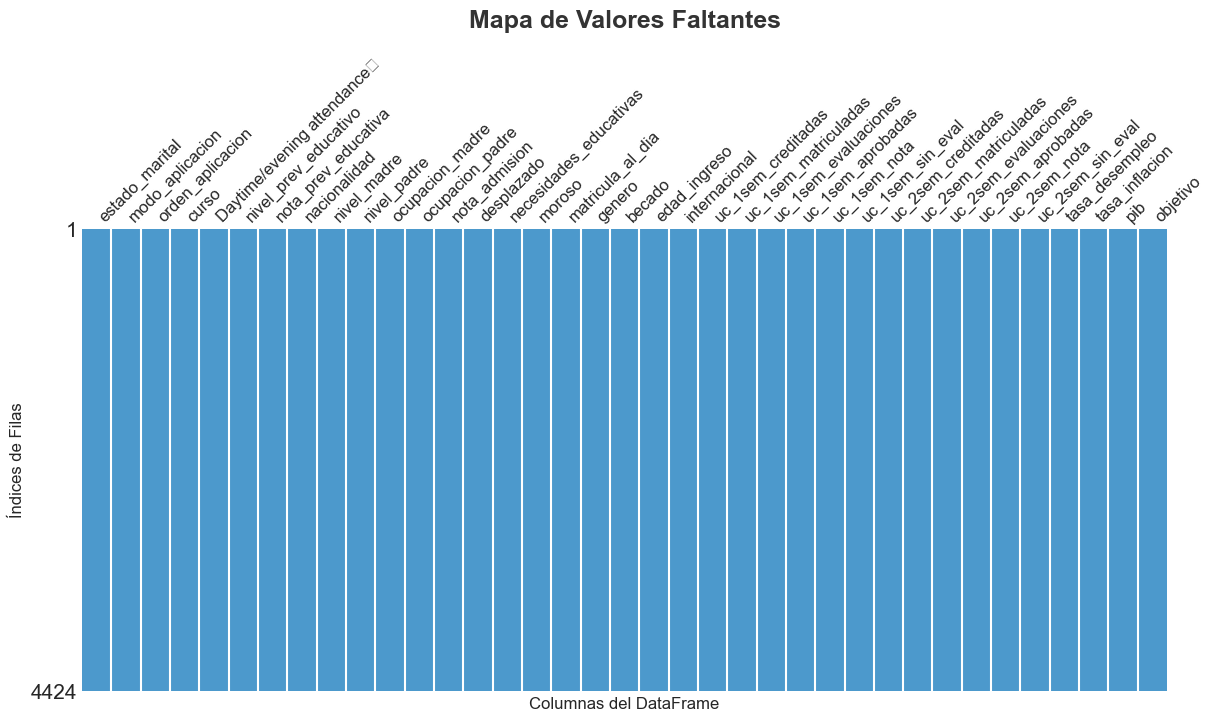

In [58]:

plt.style.use('seaborn-v0_8-darkgrid')

# Figura
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(111)

# Mapa de missing values
msno.matrix(escolar, color=(0.3, 0.6, 0.8), fontsize=12, sparkline=False, ax=ax)

# Personalización extra
plt.title("Mapa de Valores Faltantes", fontsize=18, fontweight='bold', color="#333333", pad=20)
plt.xlabel("Columnas del DataFrame", fontsize=12)
plt.ylabel("Índices de Filas", fontsize=12)

plt.show()

Podemos observar que ninguna de las variables tiene valores nulos, lo caul asegura que no es necesario realizar ningún método de imputacion.

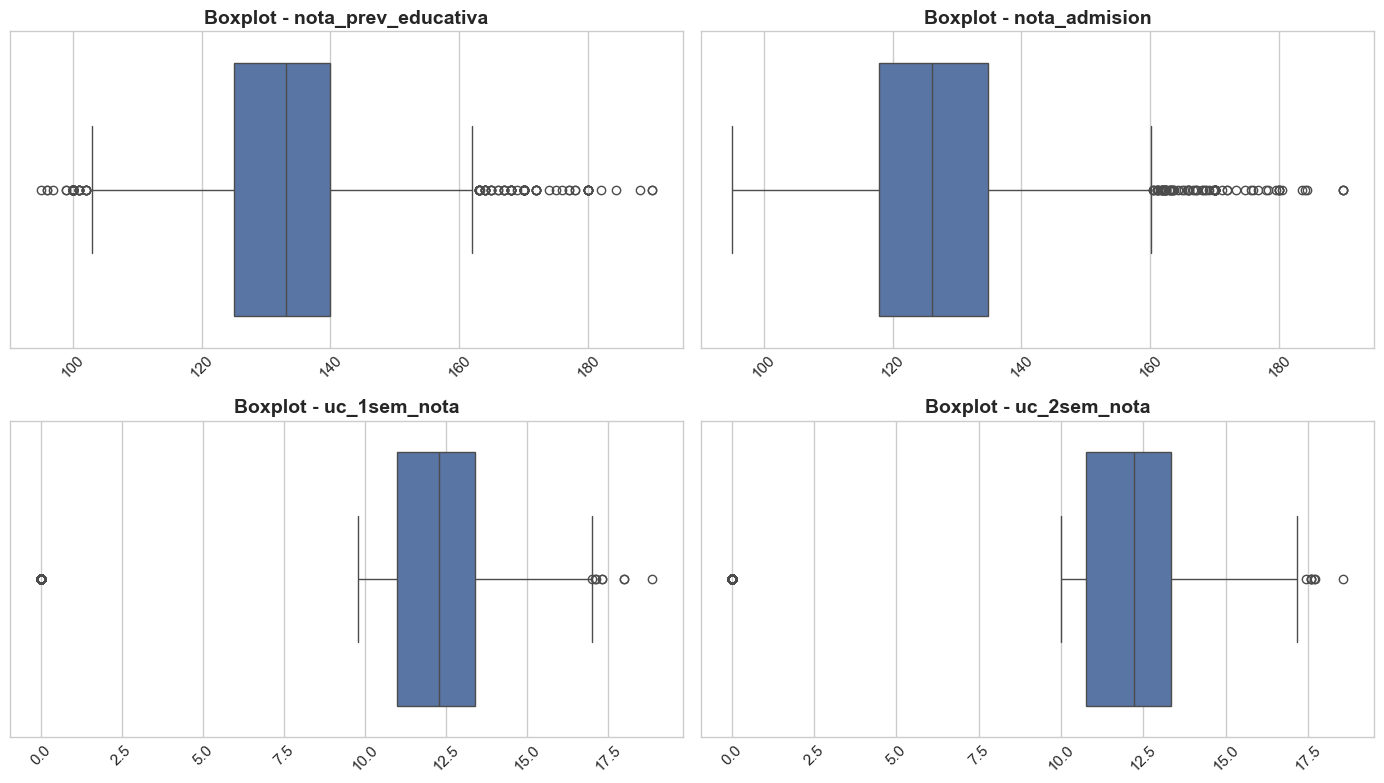

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

cols_outliers = [
    "nota_prev_educativa",
    "nota_admision",
    "uc_1sem_nota",
    "uc_2sem_nota"
]

plt.style.use("seaborn-v0_8-whitegrid")
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,8))

for ax, col in zip(axes.flatten(), cols_outliers):
    sns.boxplot(x=escolar[col], color="#4C72B0", ax=ax)
    ax.set_title(f"Boxplot - {col}", fontsize=14, fontweight='bold')
    ax.set_xlabel("")
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Análisis de variables Númericas
---
- **Notas previas y de admisión**  
  La mayoría de los estudiantes presenta puntajes en un rango medio-alto, pero existe un grupo reducido con valores muy altos o muy bajos que sobresale del resto.
---
- **Notas del 1° y 2° semestre**  
  La mediana se sitúa cerca de 12 puntos. Algunos estudiantes registran calificaciones de 0, lo que sugiere bajo rendimiento académico o abandono de materias.
---
- **Conclusión general**  
  El comportamiento central de estas variables es estable, pero los casos extremos (muy altos o muy bajos) podrían estar vinculados a diferencias significativas en la permanencia o el abandono académico.

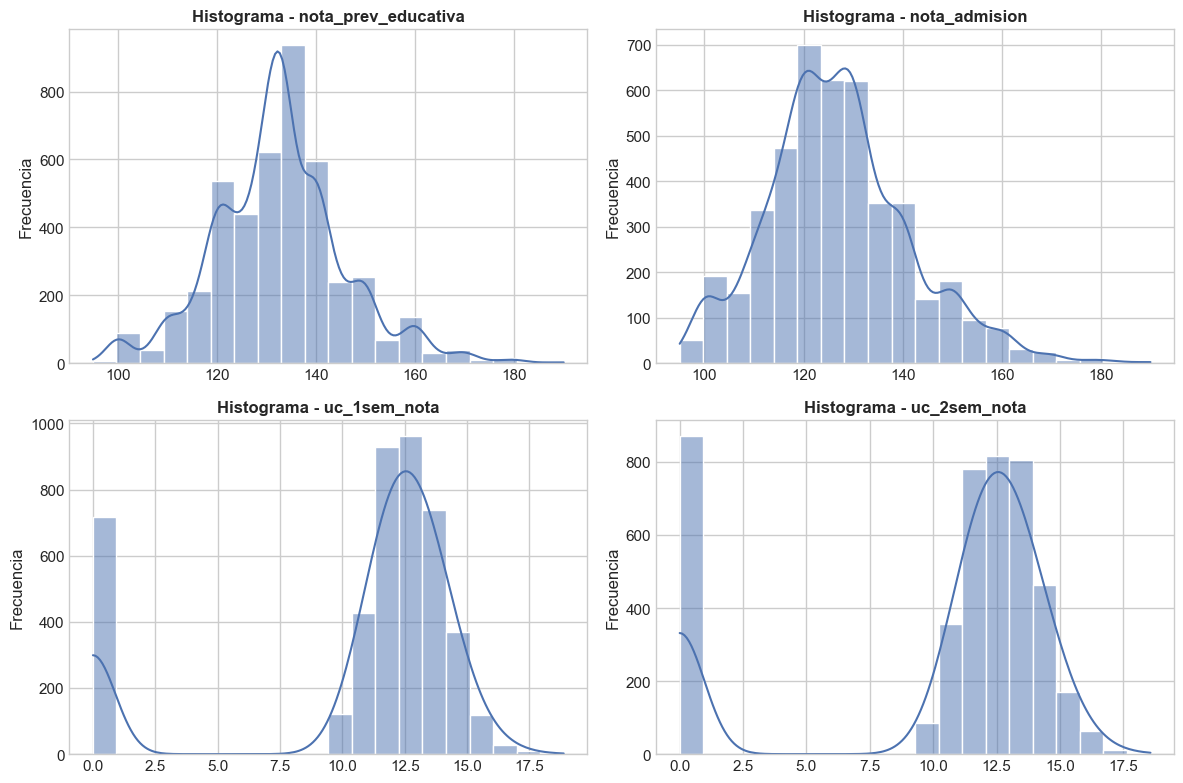

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Variables numéricas que analizamos en los boxplots
vars_box = [
    "nota_prev_educativa",
    "nota_admision",
    "uc_1sem_nota",
    "uc_2sem_nota"
]

plt.style.use("seaborn-v0_8-whitegrid")
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))

for ax, col in zip(axes.flatten(), vars_box):
    sns.histplot(data=escolar, x=col, bins=20, kde=True, ax=ax, color="#4C72B0")
    ax.set_title(f"Histograma - {col}", fontsize=12, fontweight='bold')
    ax.set_xlabel("")
    ax.set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()


### Análisis de distribución de variables numéricas

A continuación se presentan histogramas con curva de densidad para visualizar la distribución de las variables numéricas `nota_prev_educativa`, `nota_admision`, `uc_1sem_nota` y `uc_2sem_nota`.  
El análisis se centra en la forma de la distribución y posibles valores atípicos.

---

### 1. nota_prev_educativa
- Distribución aproximadamente normal, con ligera asimetría a la derecha.
- La mayoría de valores se concentran entre **120 y 145**.
- Presencia de valores más altos (>160), que podrían considerarse atípicos.

---

### 2. nota_admision
- Similar a `nota_prev_educativa`, con ligera asimetría positiva.
- Concentración principal entre **115 y 135**.
- Algunos valores superiores a 160 podrían ser casos atípicos.

---

### 3. uc_1sem_nota
- Distribución bimodal: un grupo en **0** (posible abandono o no presentación) y otro entre **10 y 14**.
- Indica que parte de los estudiantes no completaron el semestre, mientras que la mayoría logró notas altas.

---

### 4. uc_2sem_nota
- Patrón bimodal similar al primer semestre: un grupo en **0** y otro entre **11 y 14**.
- El grupo en cero podría representar estudiantes que no continuaron o no aprobaron.

---

**Conclusión general:**  
Las notas previas y de admisión presentan distribuciones cercanas a la normalidad, mientras que las notas de primer y segundo semestre evidencian un patrón bimodal, lo que sugiere un subgrupo de estudiantes con abandono o desempeño nulo.


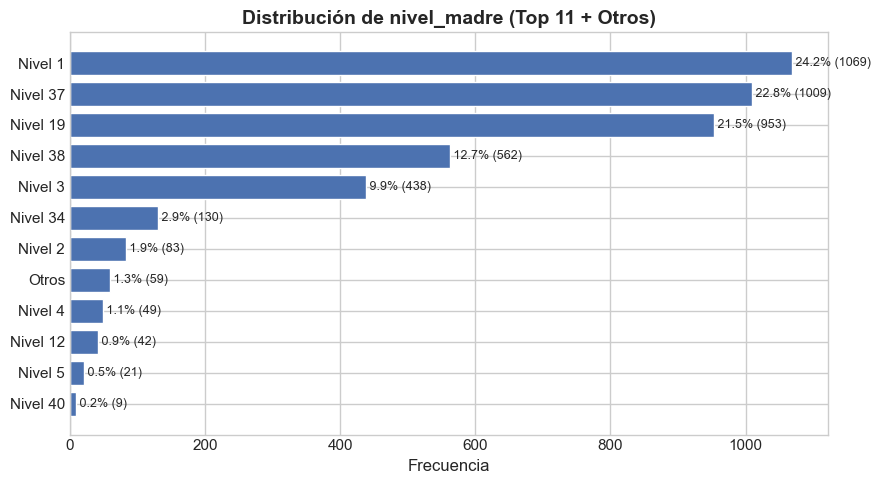

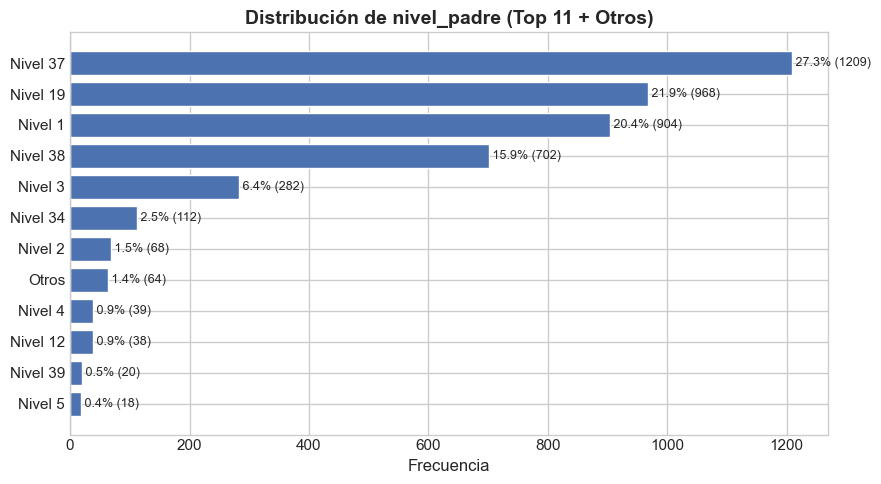

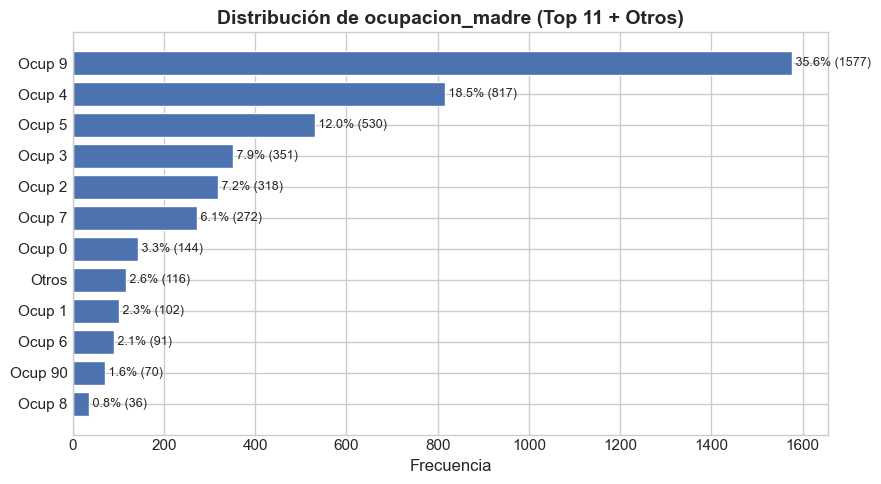

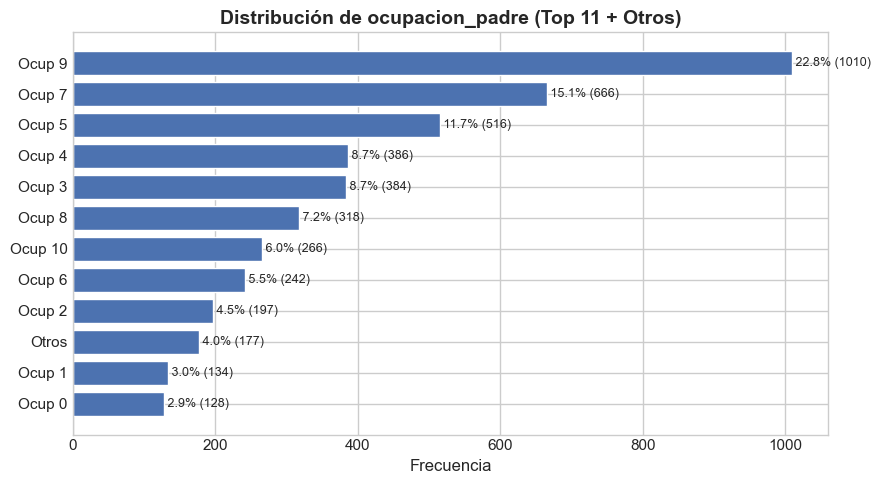

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-whitegrid")

def plot_topk_coded(df, col, top=10):
    if col not in df.columns:
        print(f"⚠️  No existe la columna: {col}")
        return
    
    # Conteos
    s = df[col].astype(str)  # forzamos string
    vc = s.value_counts(dropna=False)
    total = vc.sum()

    # Top-(k-1) + "Otros"
    topk = vc.head(max(top-1, 1))
    others = vc.iloc[top-1:].sum() if len(vc) >= top else 0

    data = topk.copy()
    if others > 0:
        data = pd.concat([data, pd.Series({"Otros": others})])

    # Preparar DataFrame para graficar (ascendente para barh)
    df_plot = (
        data.sort_values(ascending=True)
            .to_frame("frecuencia")
            .assign(pct=lambda d: (d["frecuencia"]/total*100).round(1))
            .reset_index()
            .rename(columns={"index": "codigo"})
    )

    # Etiquetas legibles
    if "nivel" in col:
        prefix = "Nivel "
    elif "ocupacion" in col:
        prefix = "Ocup "
    else:
        prefix = ""
    df_plot["label"] = df_plot["codigo"].where(df_plot["codigo"]=="Otros",
                                               prefix + df_plot["codigo"].astype(str))

    # Gráfico horizontal
    fig, ax = plt.subplots(figsize=(9, 5))
    ax.barh(df_plot["label"], df_plot["frecuencia"])
    ax.set_title(f"Distribución de {col} (Top {top-1} + Otros)", fontsize=14, fontweight="bold")
    ax.set_xlabel("Frecuencia")
    ax.set_ylabel("")

    # Anotar % y conteo
    for i, (val, pct) in enumerate(zip(df_plot["frecuencia"], df_plot["pct"])):
        ax.text(val, i, f" {pct:.1f}% ({int(val)})", va="center", fontsize=9)

    plt.tight_layout()
    plt.show()

# Úsalo así:
vars_codificadas = ["nivel_madre", "nivel_padre", "ocupacion_madre", "ocupacion_padre"]
for c in vars_codificadas:
    plot_topk_coded(escolar, c, top=12)  # prueba con 8–12 según qué tan largo salga


### Análisis de variables categóricas

Se generaron gráficos de barras horizontales para visualizar la distribución de las variables categóricas `nivel_madre`, `nivel_padre`, `ocupacion_madre` y `ocupacion_padre`.  
En cada gráfico se muestran las categorías más frecuentes (Top 11) junto con la categoría "Otros" para agrupar el resto, incluyendo el porcentaje y la frecuencia absoluta.

---

#### 1. nivel_madre
- Principales categorías: `Nivel 1` (24.2%), `Nivel 37` (22.8%), `Nivel 19` (21.5%), `Nivel 38` (12.7%).
- Observación: Cuatro niveles concentran más del 80% de los casos, indicando una fuerte concentración en pocos valores. El resto de niveles tiene baja representación (<3%).

---

#### 2. nivel_padre
- Principales categorías: `Nivel 37` (27.3%), `Nivel 19` (21.9%), `Nivel 1` (20.4%), `Nivel 38` (15.9%).
- Observación: Similar a `nivel_madre`, hay una alta concentración en pocos niveles, pero el orden de predominancia cambia. Esto sugiere cierta similitud en la distribución de niveles de ambos padres, con `Nivel 37` como el más frecuente.

---

#### 3. ocupacion_madre
- Principales categorías: `Ocup 9` (35.6%), `Ocup 4` (18.5%), `Ocup 5` (12%).
- Observación: `Ocup 9` es claramente predominante, con más de un tercio de los casos. Esto refleja una concentración aún más marcada que en las variables de nivel.

---

#### 4. ocupacion_padre
- Principales categorías: `Ocup 9` (22.8%), `Ocup 7` (15.1%), `Ocup 5` (11.7%), `Ocup 4` y `Ocup 3` (8.7% cada uno).
- Observación: Aunque hay más diversidad que en `ocupacion_madre`, sigue habiendo una concentración importante en pocas ocupaciones, especialmente en `Ocup 9`.


C:\Users\OMAR DANIEL MEDINA V\AppData\Local\Temp\ipykernel_21644\489527365.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=escolar[col], order=order, palette="Set2")


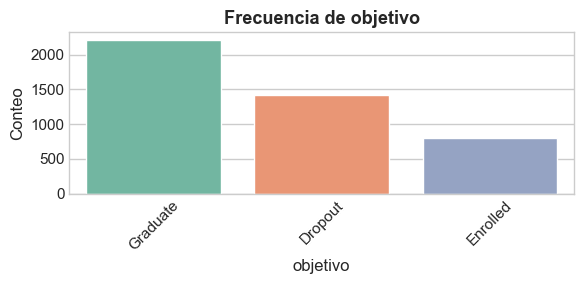

In [62]:
categorical_cols = escolar.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(6, 3))
    order = escolar[col].value_counts().index
    sns.countplot(x=escolar[col], order=order, palette="Set2")
    plt.title(f"Frecuencia de {col}", fontsize=13, fontweight='bold')
    plt.xlabel(col)
    plt.ylabel("Conteo")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

La mayoría de los estudiantes se **gradúa**, seguida por un grupo considerable que **abandona** y una minoría que sigue **inscrita**.  
Esto refleja buenos niveles de graduación, pero con margen para mejorar la retención.


# -------------------------------------------------------------------------------------------------------------------------

# Modelando desercion academica usando KNN (Clasificacion binaria)

Para esta seccion, estaremos modelando la disertacion de estudiantes basados en las observaciones ya existentes, ademas de ver las diferncias que existen dependiendo del numero de vecinos (K), en los modelos. Para esto, se van a estar construyendo tres (3) modelos, y se estaran comparando sus diferencias para observar cual es la mejor tecnica y, por ende, mejor modelo.

## Modelado sin filtrar o normalizar variables

Para un ejercicio inicial, a pesar de no ser el objetivo, podemos hacer un modelado inicial, sin necesidad de filtrar o convertir las variables para entender el contexto en el que estamos situado.

In [63]:
escolar.head()

,estado_marital,modo_aplicacion,orden_aplicacion,curso,Daytime/evening attendance\t,nivel_prev_educativo,nota_prev_educativa,nacionalidad,nivel_madre,nivel_padre,...,uc_2sem_creditadas,uc_2sem_matriculadas,uc_2sem_evaluaciones,uc_2sem_aprobadas,uc_2sem_nota,uc_2sem_sin_eval,tasa_desempleo,tasa_inflacion,pib,objetivo
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


Con esto en mente, podemos utilizar KNN, y con valores de K entre 1 y 20, podemos observar el comportamiento del modelo sin hacer ningun tipo de cambio adicional.

In [64]:
X = escolar.drop(columns='objetivo')
y = escolar['objetivo']

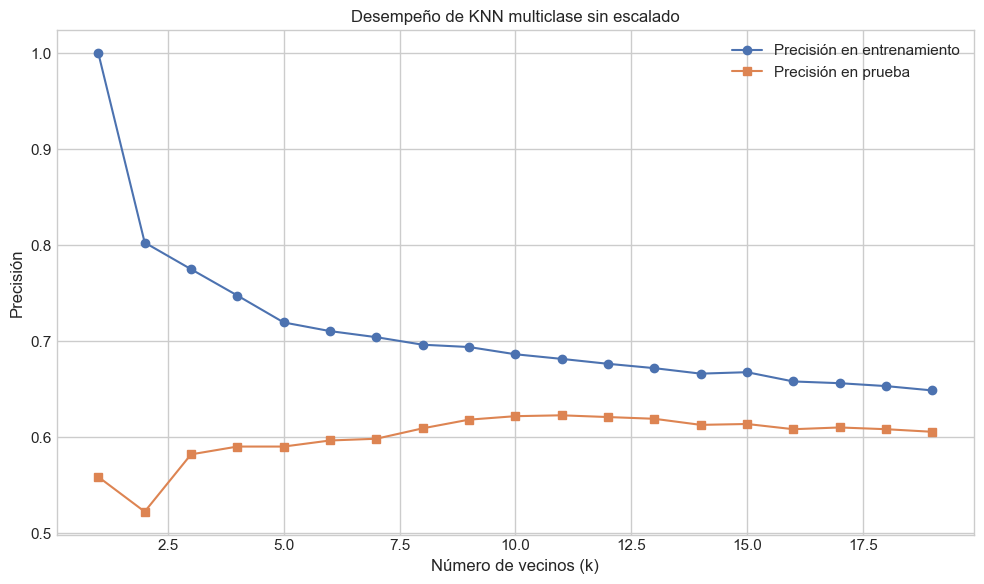

Mejor k según precisión en prueba: 11
Precisión en prueba con k=11: 0.6230


In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=66)

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 20)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

plt.figure(figsize=(10, 6))
plt.plot(neighbors_settings, training_accuracy, label="Precisión en entrenamiento", marker='o')
plt.plot(neighbors_settings, test_accuracy, label="Precisión en prueba", marker='s')
plt.xlabel("Número de vecinos (k)")
plt.ylabel("Precisión")
plt.title("Desempeño de KNN multiclase sin escalado")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

best_k_index = np.argmax(test_accuracy)
best_k = neighbors_settings[best_k_index]
best_test_acc = test_accuracy[best_k_index]

print(f"Mejor k según precisión en prueba: {best_k}")
print(f"Precisión en prueba con k={best_k}: {best_test_acc:.4f}")

model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


Basados en esto, podemos observar que el rendimiento mejora considerablemente mientras subimos el numero de vecinos con el que el modelo usa para predecir, en este caso, el numero de vecino ideal es de k=11, con una precision de 0.6230.

In [66]:
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))


Reporte de clasificación:
              precision    recall  f1-score   support

     Dropout       0.62      0.55      0.58       355
    Enrolled       0.42      0.18      0.25       199
    Graduate       0.65      0.83      0.73       552

    accuracy                           0.62      1106
   macro avg       0.56      0.52      0.52      1106
weighted avg       0.60      0.62      0.60      1106



Mas alla, vemos que el modelo tiene mucha capacidad predictiva para la categoria Graduate, y pierde potencia tanto en Dropout y Enrolled, esto tambien se evidencia en la matriz de confusion.

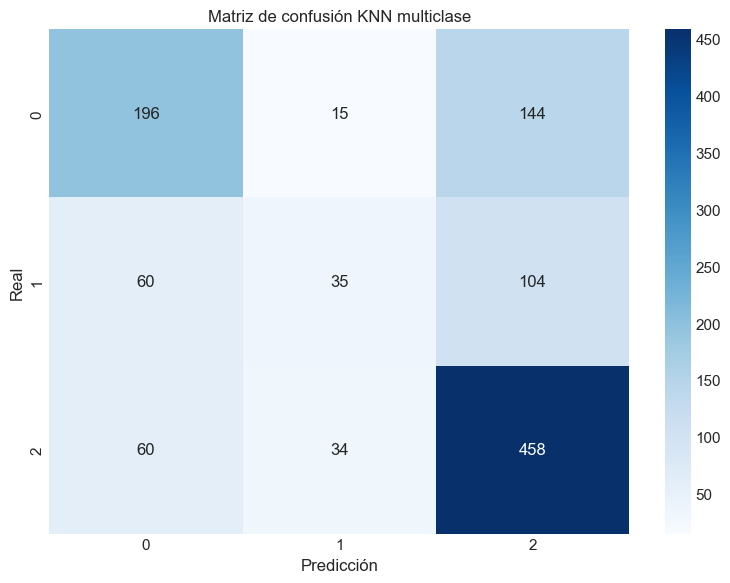

In [67]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de confusión KNN multiclase")
plt.tight_layout()
plt.show()

C:\Users\OMAR DANIEL MEDINA V\AppData\Local\Temp\ipykernel_21644\295064129.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(classes))


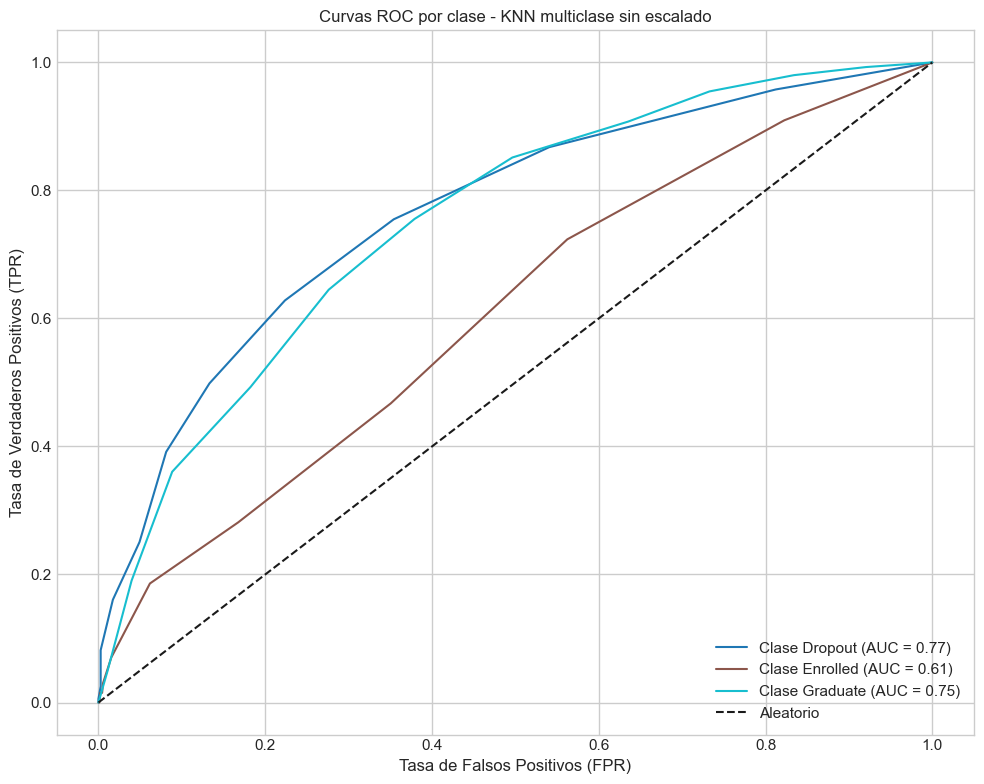

In [70]:
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)
y_score = model.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
colors = plt.cm.get_cmap('tab10', len(classes))

for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], label=f'Clase {classes[i]} (AUC = {roc_auc[i]:.2f})', color=colors(i))

plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curvas ROC por clase - KNN multiclase sin escalado')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


El resultado de la curva ROC puede resultar engañoso, pues a pesar de tener un puntaje de 0.77, 0.61 y 0.75, el modelo necesita mejorar en sus capacidades de predecir tanto Dropout y Enrolled. Para esto, convertimos nuestro Target 'objetivo' a una variable binaria, y aqui el modelo puede tener mejores resultados.

## Modelado filtrando y clasificando variables de forma binaria (sin usar StandardScaler)

Para este ejercicio, primero observemos que nuestra variable objetivo sera aquella llamada "Objetivo", la cual contiene el estado academico del estudiante, este es su estado actual.

In [71]:
escolar['objetivo'].value_counts()

objetivo
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

C:\Users\OMAR DANIEL MEDINA V\AppData\Local\Temp\ipykernel_21644\4052381920.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=targ.index, y=targ.values, palette='viridis')


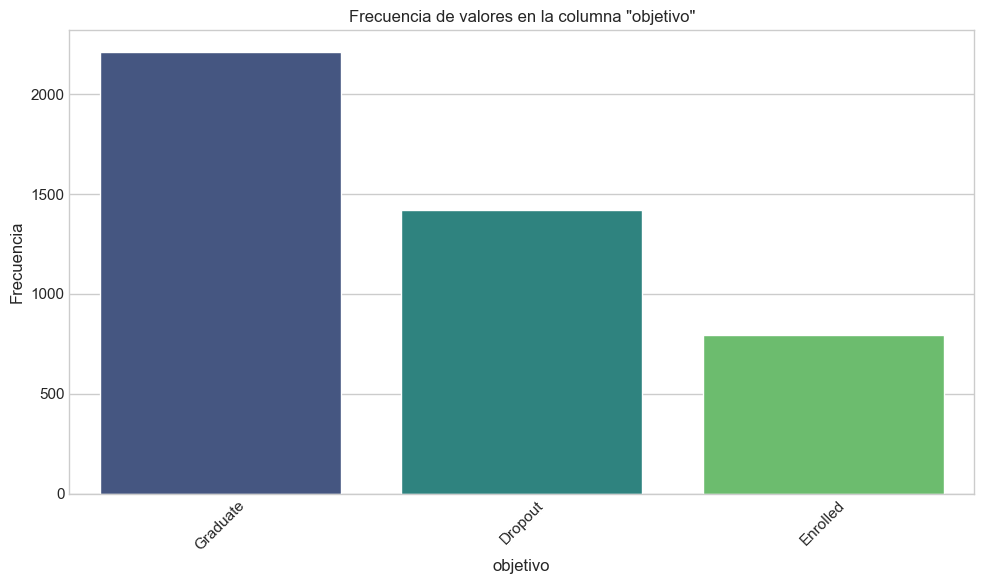

In [73]:
targ = escolar['objetivo'].value_counts()


plt.figure(figsize=(10, 6))
sns.barplot(x=targ.index, y=targ.values, palette='viridis')
plt.title(f'Frecuencia de valores en la columna "objetivo"')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Para esto, vamos a clasificar aquellos estudiantes que cursaron y graduaron, o que estan actualmente cursando como una categoria, y aquellos que se retiraron como otra. A continuacion se mostrar el resultado de dicha operacion.

In [74]:
df_escolar_bin = escolar.copy()

df_escolar_bin['objetivo'] = df_escolar_bin['objetivo'].str.lower()

def codificar_target(valor):
    if valor == 'dropout':
        return 0
    else:
        return 1

df_escolar_bin['objetivo'] = df_escolar_bin['objetivo'].apply(codificar_target)

In [75]:
df_escolar_bin.head()

,estado_marital,modo_aplicacion,orden_aplicacion,curso,Daytime/evening attendance\t,nivel_prev_educativo,nota_prev_educativa,nacionalidad,nivel_madre,nivel_padre,...,uc_2sem_creditadas,uc_2sem_matriculadas,uc_2sem_evaluaciones,uc_2sem_aprobadas,uc_2sem_nota,uc_2sem_sin_eval,tasa_desempleo,tasa_inflacion,pib,objetivo
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1


Con esto en mente, los estudiantes que estan o cursaron exitosamente se representan con el valor 1, mientras que aquellos que no con el valor 0.

In [76]:
df_escolar_bin['objetivo'].value_counts()

objetivo
1    3003
0    1421
Name: count, dtype: int64

C:\Users\OMAR DANIEL MEDINA V\AppData\Local\Temp\ipykernel_21644\536386436.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=targ.index, y=targ.values, palette='viridis')


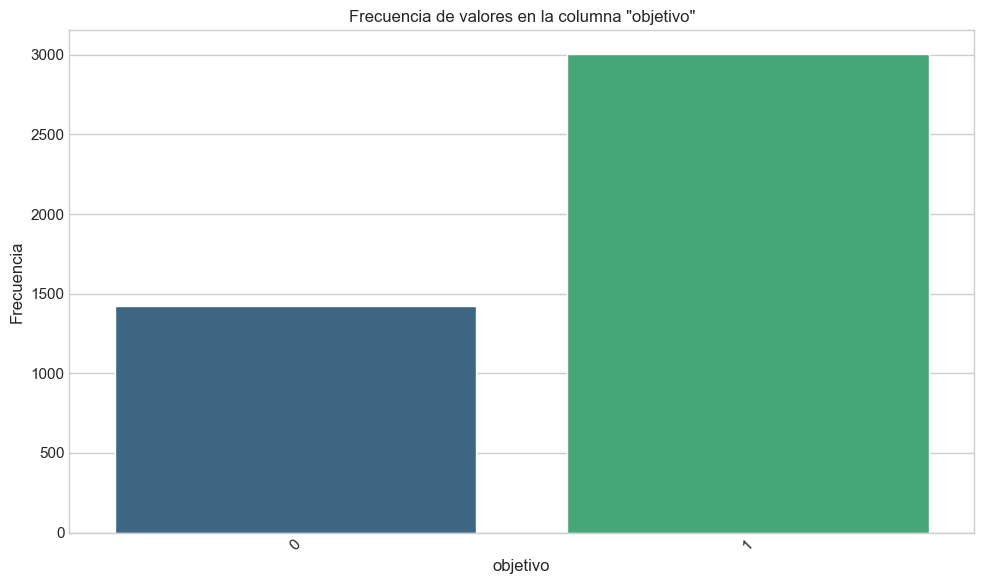

In [77]:
targ = df_escolar_bin['objetivo'].value_counts()


plt.figure(figsize=(10, 6))
sns.barplot(x=targ.index, y=targ.values, palette='viridis')
plt.title(f'Frecuencia de valores en la columna "objetivo"')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Aqui, notamos un desbalances en la clases, pero por esta vez, vamos a realizar el modelo con esta nueva clasificacion, y observaremos el comportamiento de este y sus resultados numericos a continuacion.

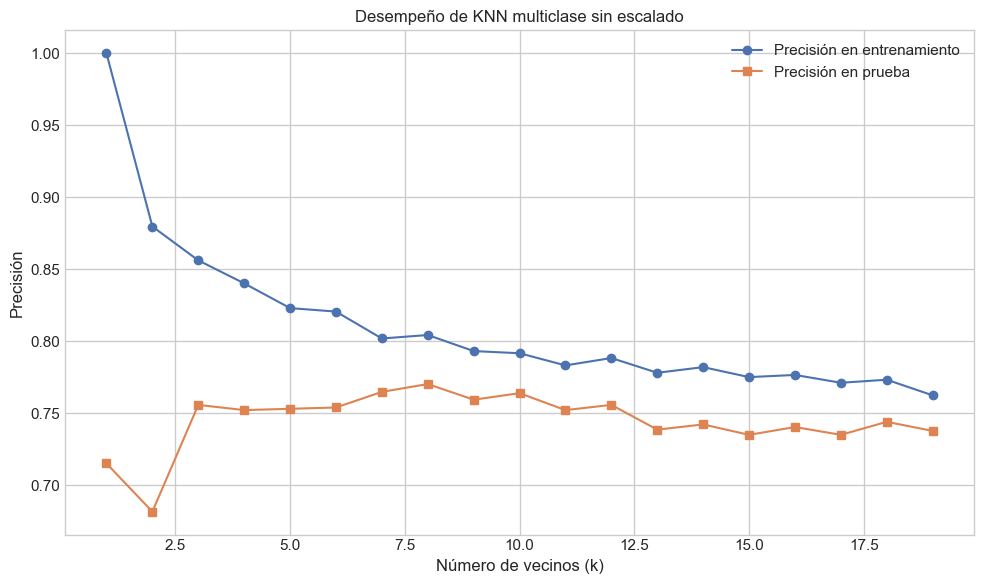

Mejor k según precisión en prueba: 8
Precisión en prueba con k=8: 0.7703


In [78]:
X = df_escolar_bin.drop(columns='objetivo')
y = df_escolar_bin['objetivo']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=66
)

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 20)

for k in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

plt.figure(figsize=(10, 6))
plt.plot(neighbors_settings, training_accuracy, label="Precisión en entrenamiento", marker='o')
plt.plot(neighbors_settings, test_accuracy, label="Precisión en prueba", marker='s')
plt.xlabel("Número de vecinos (k)")
plt.ylabel("Precisión")
plt.title("Desempeño de KNN multiclase sin escalado")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

best_k_index = np.argmax(test_accuracy)
best_k = neighbors_settings[best_k_index]
best_test_acc = test_accuracy[best_k_index]

print(f"Mejor k según precisión en prueba: {best_k}")
print(f"Precisión en prueba con k={best_k}: {best_test_acc:.4f}")

model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

A diferencia del modelo anterior, este nuevo modelo tiene mayor capacidad predictiva, con el numero optimo de vecinoes k=8, y teniendo una precision de 0.7703.

In [79]:
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.68      0.53      0.60       355
           1       0.80      0.88      0.84       751

    accuracy                           0.77      1106
   macro avg       0.74      0.71      0.72      1106
weighted avg       0.76      0.77      0.76      1106



Estos resultados numericos muestra que el modelo tiende a ser mejor clasificando a aquellos estudiantes que se mantienen estudiando o ya se graduaron, y cae en terminos de precision tanto recall, precision y f1-score para los estudiantes que no estan en las categorias mencionadas anteriormente, estos tambien se pueden visualizar en la matriz de confusion a continuacion.

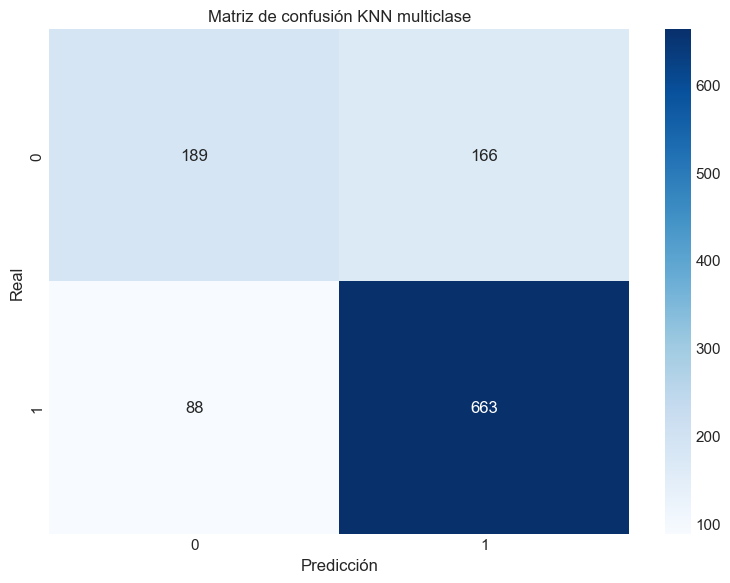

In [80]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de confusión KNN multiclase")
plt.tight_layout()
plt.show()


A diferencia del primer modelo, este modelo es considerablemente mejor para predecir aquellos estudiantes que son considerados "positivos", o que siguen en estudios, a comparacion de aquellos "negativos", que no estan estudiando.

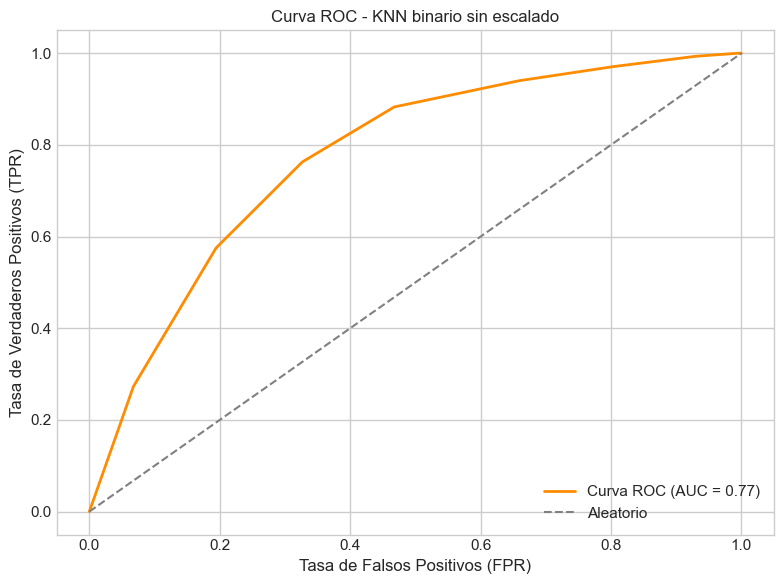

In [81]:
y_score = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Aleatorio')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - KNN binario sin escalado')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

A pesar de lo anterior, el area bajo la curva ROC muestra una constancia en terminos de su puntaje, al tambien obtener 0.77, lo cual nos permite saber que el modelo aun tiene margen para mejorar y poder tener predicciones mas precisas.

## Modelado filtrando y clasificando variables de forma binaria (usando StandardScaler)

Para este modelo, consideraremos la misma situacion que el modelo anterior, pero usaremos la funcion StandardScaler para balancear las clases en la variable "objetivo", las cuales tienen desbalance.

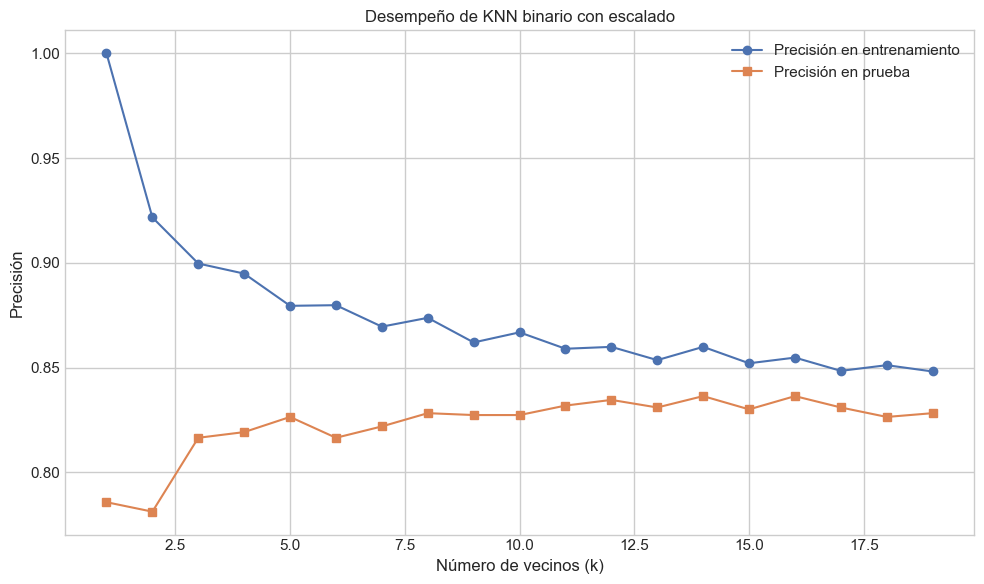

Mejor k según precisión en prueba: 14
Precisión en prueba con k=14: 0.8363


In [82]:
X = df_escolar_bin.drop(columns='objetivo')
y = df_escolar_bin['objetivo']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=66
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 20)

for k in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train_scaled, y_train)
    training_accuracy.append(clf.score(X_train_scaled, y_train))
    test_accuracy.append(clf.score(X_test_scaled, y_test))

plt.figure(figsize=(10, 6))
plt.plot(neighbors_settings, training_accuracy, label="Precisión en entrenamiento", marker='o')
plt.plot(neighbors_settings, test_accuracy, label="Precisión en prueba", marker='s')
plt.xlabel("Número de vecinos (k)")
plt.ylabel("Precisión")
plt.title("Desempeño de KNN binario con escalado")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

best_k_index = np.argmax(test_accuracy)
best_k = neighbors_settings[best_k_index]
best_test_acc = test_accuracy[best_k_index]

print(f"Mejor k según precisión en prueba: {best_k}")
print(f"Precisión en prueba con k={best_k}: {best_test_acc:.4f}")

model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

La diferencia esencial entre ambos modelos es el uso de StandardScaler, para poder balancear la prevalencia de observaciones entre ambas clases, y el resultado se puede ver evidenciado, con una precision de 0.8363 para un numero de vecinos de k=14, siendo este el mas optimo.

In [83]:
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.87      0.57      0.69       355
           1       0.83      0.96      0.89       751

    accuracy                           0.84      1106
   macro avg       0.85      0.77      0.79      1106
weighted avg       0.84      0.84      0.83      1106



El modelo presento mejoras en casi todas los aspectos de resumenes numericos, a excepcion de recall para la variable "Dropout", el cual tuvo problemas, y el cual tambien se evidencia dentro de la matriz de confusion. No obstante, es una mejoria con respecto a los dos modelos anteriores.

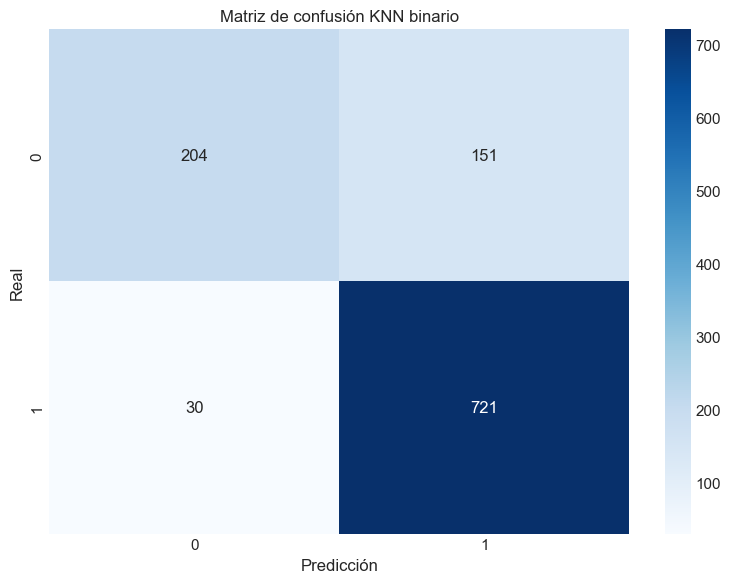

In [84]:

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de confusión KNN binario")
plt.tight_layout()
plt.show()

El modelo presenta una mejoria constante sobre determinar la categoria "Dropout", sin embargo, aun sigue presentando problemas. Para la variable positiva "Graduate" o "Enrolled" parece funcionar de forma excepcional y este tambien ha tenido mejoria en el transcurso de la elaboracion de los modelos.

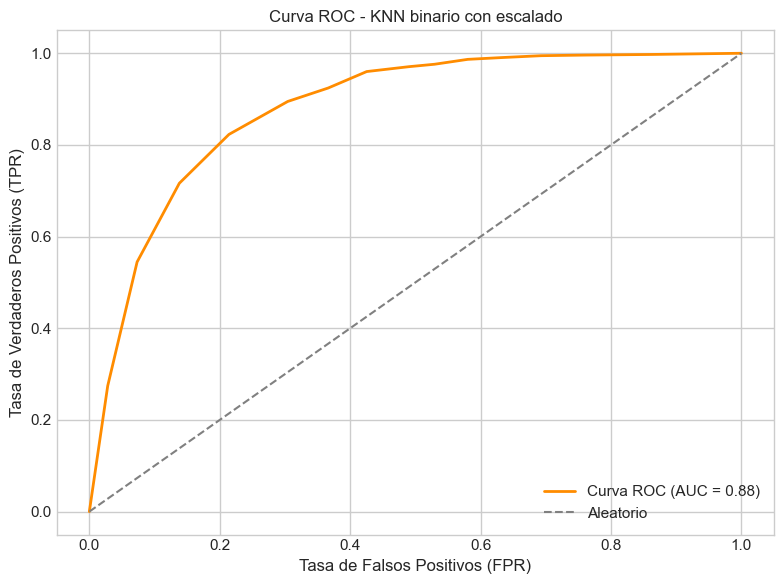

In [85]:
y_score = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Aleatorio')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - KNN binario con escalado')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

Y, a diferencia de los dos modelos anteriores, este tiene un mejor comportamiento del puntaje bajo la curva ROC, teniendo un score de 0.88, lo cual es un incremento con relacion a los ultimos dos modelos.

En relacion a los tres modelos, este ultimo, que es una combinacion tanto de implementar un KNN con variables binarias y usar StandardScaler muestra el mejor puntaje, tanto numerico como graficamente. A pesar de esto, los modelos planteados tienen margen de mejora y con diferente implementacion, pueden mejorar.

# Modelando promedios escolares a fin de semestre academico usando KNN (Regresion continua)

A continuacion, vamos a implementar un modelo que va a predecir promedios con relacion a estudiantes bajo el dataset utilizando regresion contínua. Pero antes de implementar, necesitamos estandarizar y codificar algunas variables.

Para poder predecir cantidades continuas, vamos a necesitar que el modelo compare los valores con una variable de este mismo tipo. Por esto mismo, se va a codificar una variable que explique el promedio ponderado del estudiante, explicado en las notas del estudiante de un semestre sobre la cantidad de creditos aprobados.

Adicional a esto, tenemos en cuenta que aquellos estudiantes que abandonan, tendran la cantidad de cero (0) en creditos aprobados, para esto, solo colocamos el valor de '0' si detecta en su estado academico.

In [87]:
df_escolar_fin = df_escolar_bin.copy()


carga_total = df_escolar_bin['uc_1sem_matriculadas'] + df_escolar_bin['uc_2sem_matriculadas']

nota_ponderada = (
    df_escolar_bin['uc_1sem_nota'] * df_escolar_bin['uc_1sem_aprobadas'] +
    df_escolar_bin['uc_2sem_nota'] * df_escolar_bin['uc_2sem_aprobadas']
)

indice_acumulado = nota_ponderada / carga_total

abandono_mask = df_escolar_bin['objetivo'] == 0
indice_acumulado[abandono_mask] = 0

df_escolar_fin['indice_acumulado'] = indice_acumulado.fillna(0)

Con esto a la mano, podemos visualizar y tener una idea bajo la proporcion con la que se esta trabajando.

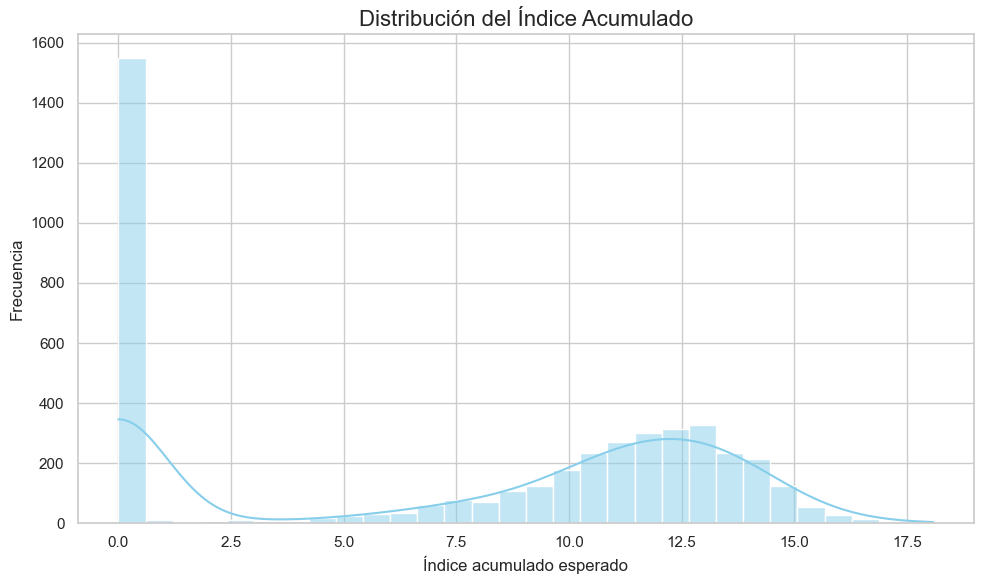

In [88]:
df_escolar_fin['indice_acumulado'].value_counts()

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(df_escolar_fin['indice_acumulado'], bins=30, kde=True, color='skyblue')

plt.title('Distribución del Índice Acumulado', fontsize=16)
plt.xlabel('Índice acumulado esperado')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()


Aqui, observamos que, debido a lo anterior sobre los estudiantes que desertaron, mucha de la proporcion dentro de las notas calculadas seran '0'. Esto puede generar un problema de sesgo a la hora de clasificar cuando creemos el modelo, pero por ahora, visualizemos tambien las notas ponderadas sin tener en cuenta a las notas de '0'.

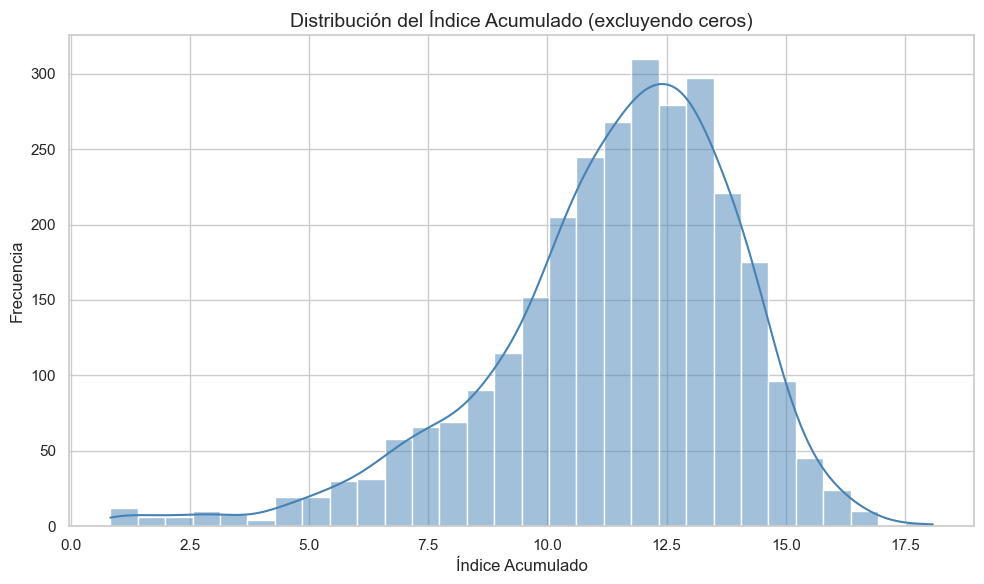

In [89]:
df_filtrado = df_escolar_fin[df_escolar_fin['indice_acumulado'] != 0].copy()

sns.set(style='whitegrid')

plt.figure(figsize=(10, 6))
sns.histplot(data=df_filtrado, x='indice_acumulado', bins=30, kde=True, color='steelblue')

plt.title('Distribución del Índice Acumulado (excluyendo ceros)', fontsize=14)
plt.xlabel('Índice Acumulado')
plt.ylabel('Frecuencia')
plt.tight_layout()

plt.show()

Con este grafico en mente, tenemos una mejor visualizacion de la proporcionalidad y distribucion de los datos a trabajar. Inicialmente aparentan tener una distribucion aproximadamente normal, pero viendo que no tienen un peso, no afectara los puntajes y las predicciones del modelo.

Para esto, se propuso tener dos modelos: el primero hara regresion en base a las notas de todos los estudiantes, mientras que el segundo modelo tendra el factor de estudiantes actuales, con notas diferentes de cero. Esto nos podra dar una idea del margen y como afectan esto a las predicciones futuras de ambos modelos.

## Modelado teniendo en cuenta todos los puntajes de estudiantes.

Aqui, vamos a tener en cuenta todos los posibles puntajes para la regresion del modelo, y luego se veran los resultados numericos y el comportamiento del error con el numero de vecinos k.

c:\Users\OMAR DANIEL MEDINA V\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\OMAR DANIEL MEDINA V\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\OMAR DANIEL MEDINA V\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\OMAR DANIEL MEDINA V\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be remove

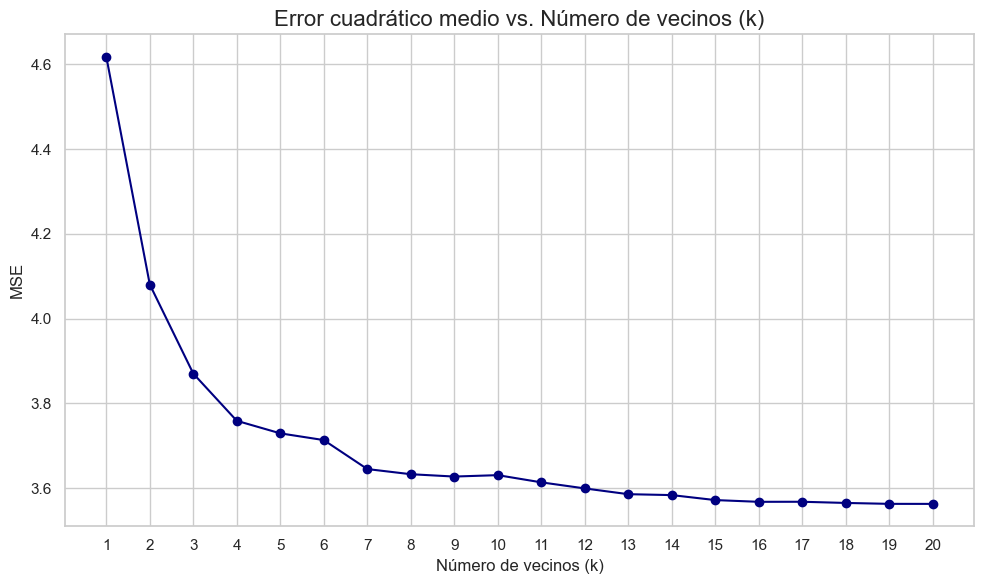

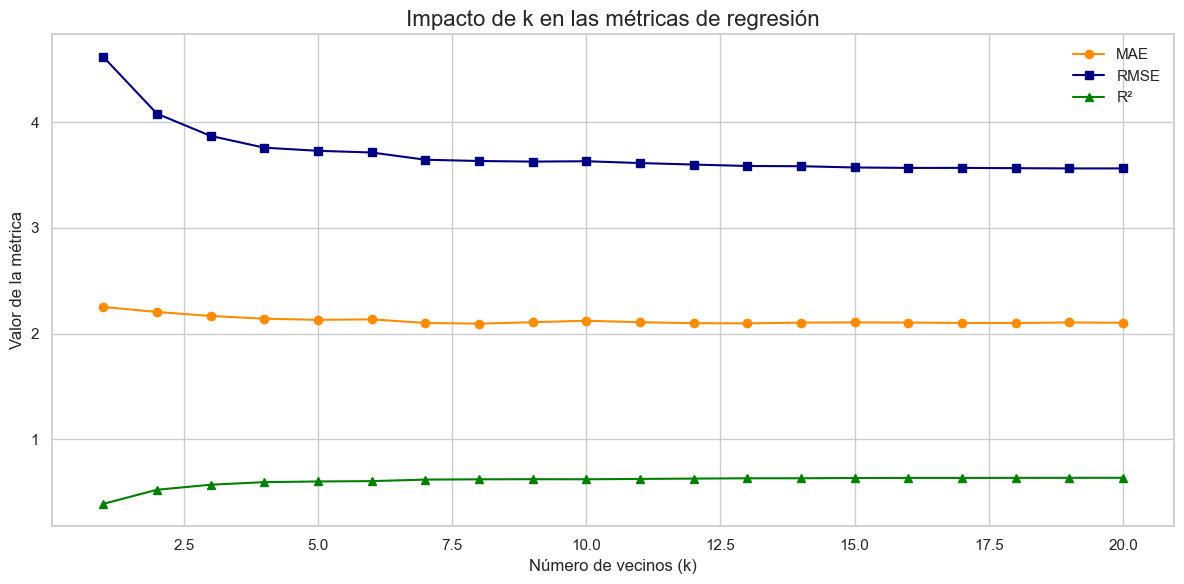

In [94]:
from sklearn.metrics import mean_squared_error

X = df_escolar_fin[['uc_1sem_aprobadas', 'uc_2sem_aprobadas', 'uc_1sem_nota', 'uc_2sem_nota']]
y = df_escolar_fin['indice_acumulado']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mae_list = []
rmse_list = []
r2_list = []
results = []

for k in range(1, 21):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred,squared=False)
    r2 = r2_score(y_test, y_pred)
    
    mae_list.append(mae)
    rmse_list.append(rmse)
    r2_list.append(r2)

    results.append({'k': k, 'MAE': mae, 'RMSE': rmse, 'R²': r2})

plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), rmse_list, marker='o', linestyle='-', color='navy')
plt.title('Error cuadrático medio vs. Número de vecinos (k)', fontsize=16)
plt.xlabel('Número de vecinos (k)')
plt.ylabel('MSE')
plt.xticks(range(1, 21))
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(range(1,21), mae_list, marker='o', label='MAE', color='darkorange')
plt.plot(range(1, 21), rmse_list, marker='s', label='RMSE', color='navy')
plt.plot(range(1, 21), r2_list, marker='^', label='R²', color='green')
plt.title('Impacto de k en las métricas de regresión', fontsize=16)
plt.xlabel('Número de vecinos (k)')
plt.ylabel('Valor de la métrica')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

k_optimo = 20
knn_final = KNeighborsRegressor(n_neighbors=k_optimo)
knn_final.fit(X_train_scaled, y_train)
y_pred_final = knn_final.predict(X_test_scaled)

Con el resultado, podemos analizar varios aspectos:

- Mientras incrementa el numero de vecinos k, el RMSE (Error cuadratico Medio) decrementa considerablemente, pero se mantiene constante en cierto punto.
- El MAE (Error medio absoluto) tambien decrementa, aunque a un ritmo menor al del RMSE.
- El R2 tiene un incremento considerable, pero llega a ser casi constante cuando el numero de K incrementa.

Estos resultados tambien se pueden evidenciar en la tabla de resultados a continuacion.

In [95]:
results_df = pd.DataFrame(results)
print(results_df)

     k       MAE      RMSE        R²
0    1  2.252910  4.617958  0.390829
1    2  2.205543  4.080227  0.524437
2    3  2.167607  3.870023  0.572175
3    4  2.141718  3.758631  0.596449
4    5  2.131012  3.729026  0.602781
5    6  2.135791  3.713123  0.606161
6    7  2.101007  3.644730  0.620536
7    8  2.094954  3.632553  0.623067
8    9  2.108399  3.627037  0.624212
9   10  2.122423  3.630350  0.623525
10  11  2.108406  3.613375  0.627037
11  12  2.099411  3.599031  0.629992
12  13  2.097450  3.585417  0.632786
13  14  2.104708  3.583259  0.633228
14  15  2.106758  3.571507  0.635630
15  16  2.104932  3.567392  0.636469
16  17  2.101689  3.567528  0.636442
17  18  2.100925  3.564741  0.637009
18  19  2.106189  3.562586  0.637448
19  20  2.103239  3.562492  0.637467


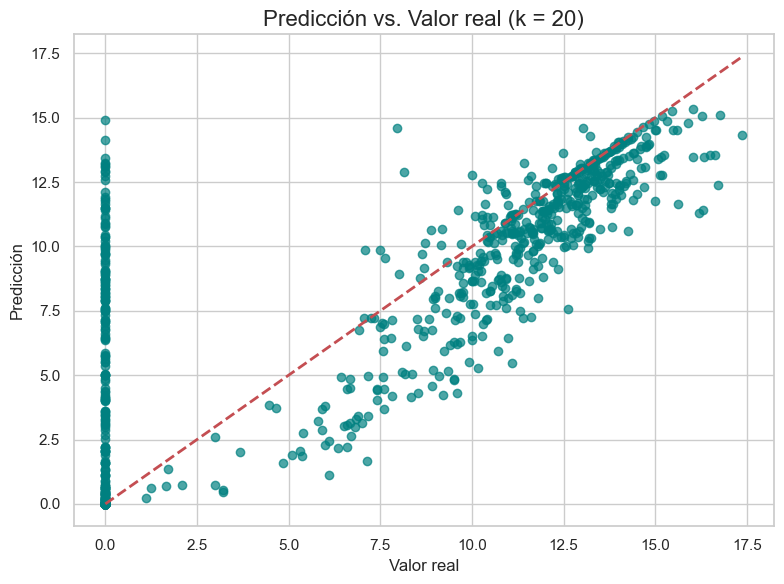

In [96]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_final, alpha=0.7, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title(f'Predicción vs. Valor real (k = {k_optimo})', fontsize=16)
plt.xlabel('Valor real')
plt.ylabel('Predicción')
plt.grid(True)
plt.tight_layout()
plt.show()

In [99]:
mae_final = mean_absolute_error(y_test, y_pred_final)
rmse_final = mean_squared_error(y_test, y_pred_final,squared=False)
r2_final = r2_score(y_test, y_pred_final)

print(f"Optimo k = {k_optimo}")
print("-----------------------")
print(f"MAE  = {mae_final:.2f}")
print(f"RMSE = {rmse_final:.2f}")
print(f"R²   = {r2_final:.2f}")

Optimo k = 20
-----------------------
MAE  = 2.10
RMSE = 3.56
R²   = 0.64


c:\Users\OMAR DANIEL MEDINA V\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Para este modelo, se tuvieron en cuenta hasta un numero de vecinos K=20, y este determino que el mejor era este, con un puntaje del R2 de 0.64, con amplio margen de mejora.

## Modelado teniendo en cuenta solamente puntajes de estudiantes en curso.

Para este modelo de regresion continua, se van a "ignorar" aquellos puntajes de estudiantes que esten sobre "0".

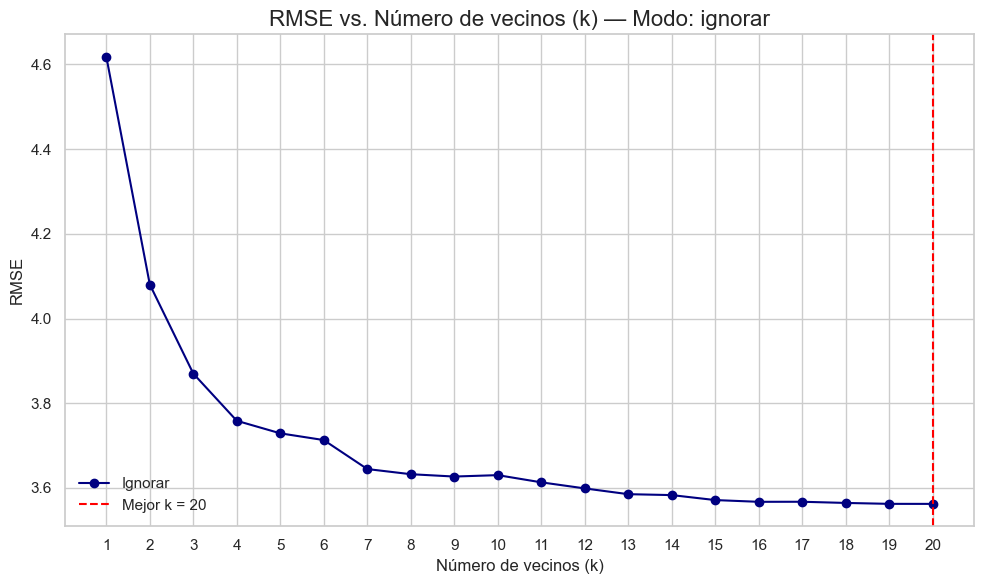

In [100]:
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def evaluar_knn(df, modo='ignorar', k_max=20):
    df_filtrado = df.copy()

    X = df_filtrado[['uc_1sem_aprobadas', 'uc_2sem_aprobadas', 'uc_1sem_nota', 'uc_2sem_nota']]
    y = df_filtrado['indice_acumulado']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    rmse_list = []

    for k in range(1, k_max + 1):
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(X_train_scaled, y_train)
        y_pred = knn.predict(X_test_scaled)
        rmse = root_mean_squared_error(y_test, y_pred)
        rmse_list.append(rmse)

    idx_mejor_k = np.argmin(rmse_list)
    k_mejor = idx_mejor_k + 1

    return {
        'RMSE': rmse_list,
        'k_mejor': k_mejor
    }

result_ignorar = evaluar_knn(df_escolar_fin, modo='ignorar')

def graficar_rmse(result, modo, color):
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 21), result['RMSE'], marker='o', linestyle='-', color=color, label=f'{modo.capitalize()}')
    plt.axvline(result['k_mejor'], color='red', linestyle='--', label=f'Mejor k = {result["k_mejor"]}')
    plt.title(f'RMSE vs. Número de vecinos (k) — Modo: {modo}', fontsize=16)
    plt.xlabel('Número de vecinos (k)')
    plt.ylabel('RMSE')
    plt.xticks(range(1, 21))
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

graficar_rmse(result_ignorar, 'ignorar', 'navy')


Para esta version del modelo, tiene un comportamiento similar al anterior, y el RMSE disminuye a medida que se incrementa el valor de los vecinos k. En este caso, el pico es de K=20.

In [101]:
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def evaluar_knn_con_metricas(df, k_max=20):
    df_filtrado = df.copy()

    X = df_filtrado[['uc_1sem_aprobadas', 'uc_2sem_aprobadas', 'uc_1sem_nota', 'uc_2sem_nota']]
    y = df_filtrado['indice_acumulado']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    resultados = []

    for k in range(1, k_max + 1):
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(X_train_scaled, y_train)
        y_pred = knn.predict(X_test_scaled)

        mae = mean_absolute_error(y_test, y_pred)
        rmse = root_mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        resultados.append({
            'k': k,
            'MAE': mae,
            'RMSE': rmse,
            'R²': r2
        })

    return pd.DataFrame(resultados)

tabla_resultados = evaluar_knn_con_metricas(df_escolar_fin, k_max=20)
print(tabla_resultados.round(4))


     k     MAE    RMSE      R²
0    1  2.2529  4.6180  0.3908
1    2  2.2055  4.0802  0.5244
2    3  2.1676  3.8700  0.5722
3    4  2.1417  3.7586  0.5964
4    5  2.1310  3.7290  0.6028
5    6  2.1358  3.7131  0.6062
6    7  2.1010  3.6447  0.6205
7    8  2.0950  3.6326  0.6231
8    9  2.1084  3.6270  0.6242
9   10  2.1224  3.6304  0.6235
10  11  2.1084  3.6134  0.6270
11  12  2.0994  3.5990  0.6300
12  13  2.0975  3.5854  0.6328
13  14  2.1047  3.5833  0.6332
14  15  2.1068  3.5715  0.6356
15  16  2.1049  3.5674  0.6365
16  17  2.1017  3.5675  0.6364
17  18  2.1009  3.5647  0.6370
18  19  2.1062  3.5626  0.6374
19  20  2.1032  3.5625  0.6375


Los resultados numericos hacen observar de un pico en alrededor K=9, y luego el avance es menos gradual, con el ultimo K=20 teniendo un R2 de 0.6375.

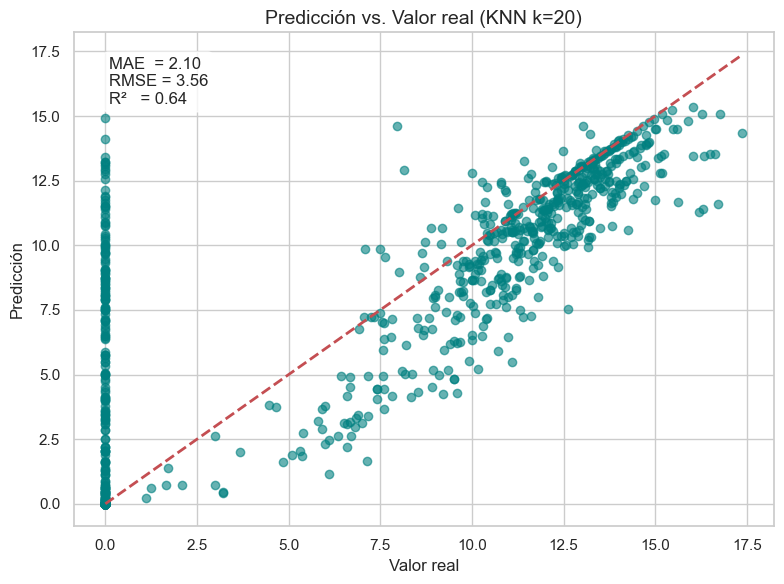

In [102]:
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def evaluar_knn_ignorar(df, k=20):
    df_mod = df.copy()

    X = df_mod[['uc_1sem_aprobadas', 'uc_2sem_aprobadas', 'uc_1sem_nota', 'uc_2sem_nota']]
    y = df_mod['indice_acumulado']

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    # Cálculo de métricas
    mae = mean_absolute_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return y_test, y_pred, mae, rmse, r2

y_test, y_pred, mae, rmse, r2 = evaluar_knn_ignorar(df_escolar_fin, k=20)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Predicción vs. Valor real (KNN k=20)', fontsize=14)
plt.xlabel('Valor real')
plt.ylabel('Predicción')
plt.grid(True)

plt.text(0.05, 0.95, f"MAE  = {mae:.2f}\nRMSE = {rmse:.2f}\nR²   = {r2:.2f}",
         transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

Finalmente, podemos observar una representación visual de los resultados, la cual evidencia cómo la regresión se ve afectada en términos numéricos al excluir los valores de los estudiantes que abandonaron sus estudios. Esta diferencia resalta la importancia de considerar o no a estos casos en el análisis, ya que su presencia o ausencia puede influir significativamente en la precisión y la capacidad predictiva del modelo.

En relación con ambos modelos, si bien presentan puntajes de R² similares, resulta más conveniente priorizar el primero, dado que incorpora los puntajes de los estudiantes retirados o "Dropout". Esto permite obtener una visión más completa y realista del comportamiento académico general, evitando sesgos derivados de ignorar a una parte de la población estudiantil. Además, este enfoque deja en claro que aún existe margen de mejora al aplicar otros modelos de aprendizaje automático que puedan optimizar las métricas de error y capturar patrones más complejos en los datos.